# Breast Cancer Predication

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [3]:
df = pd.read_csv("breast-cancer.csv" , index_col=False)
print(df.head(5))
print(df.shape)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Exploratory Data Analysis

In [5]:
print(df.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


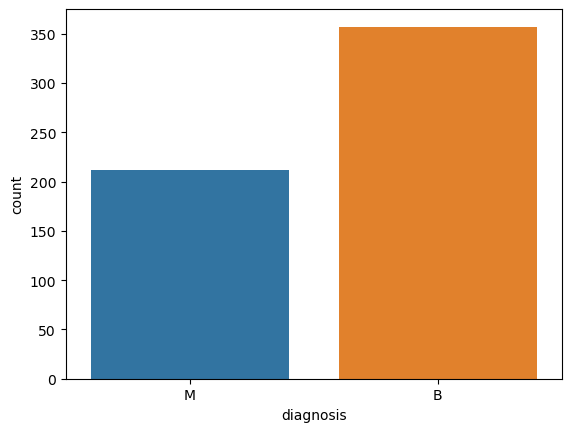

In [7]:
sns.countplot(data=df, x='diagnosis')
plt.show()

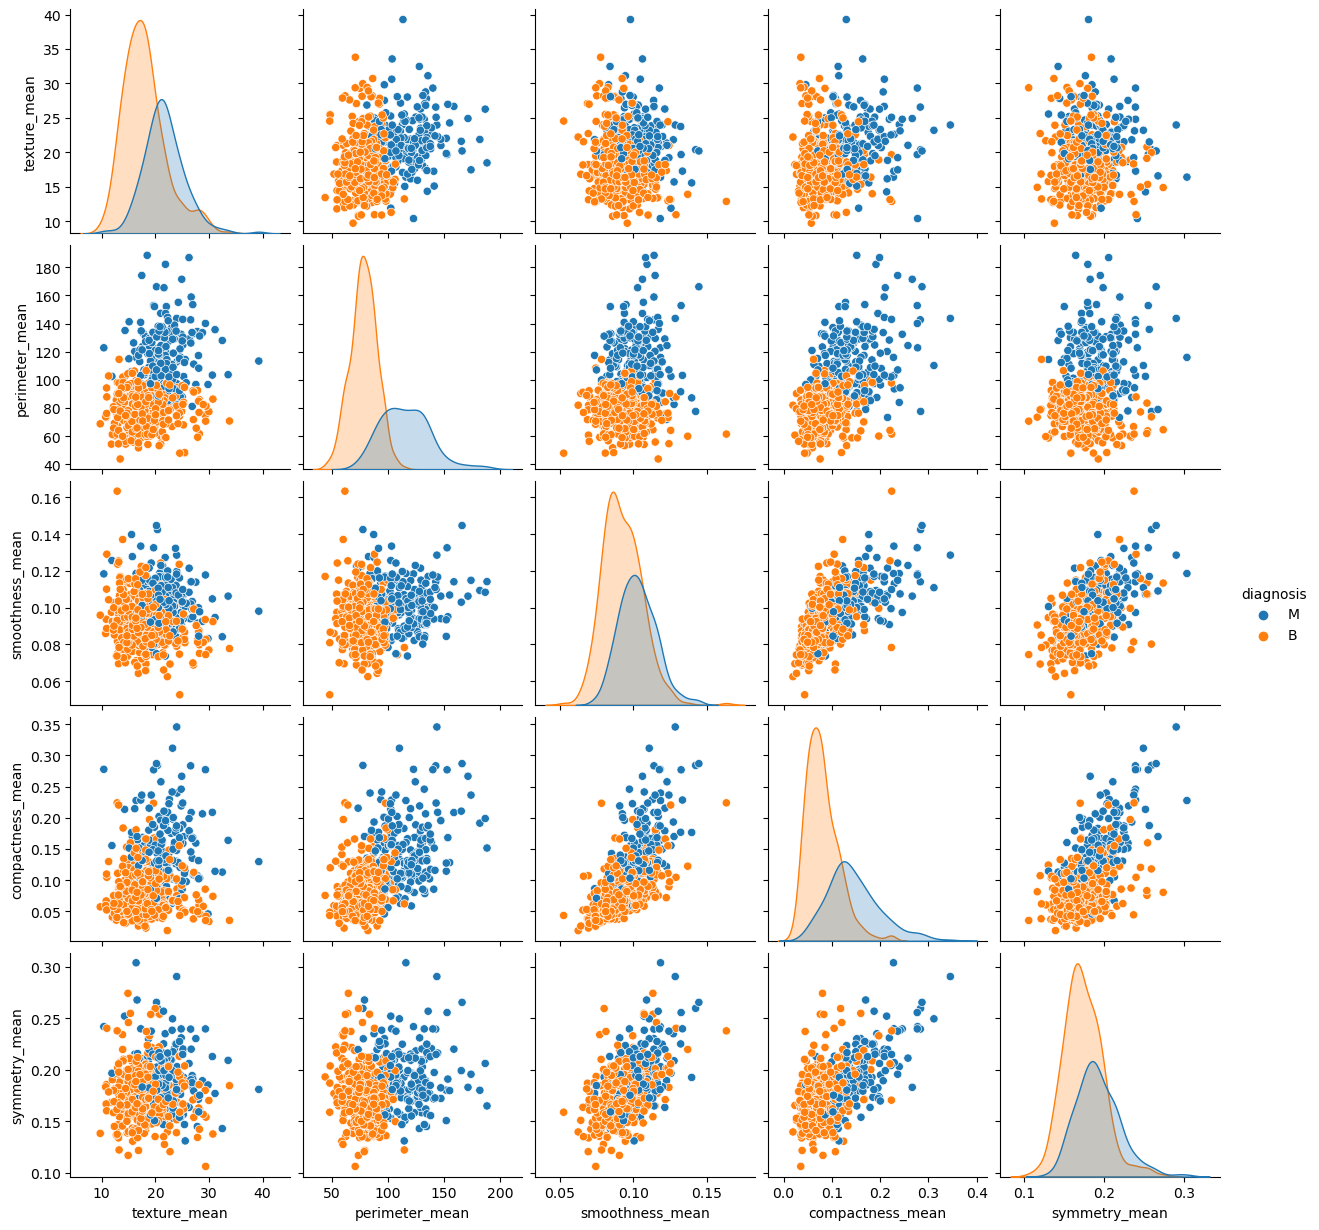

In [8]:
sns.pairplot(df, hue='diagnosis', vars=['texture_mean', 'perimeter_mean',
                  'smoothness_mean', 'compactness_mean',
                  'symmetry_mean'])
plt.show()

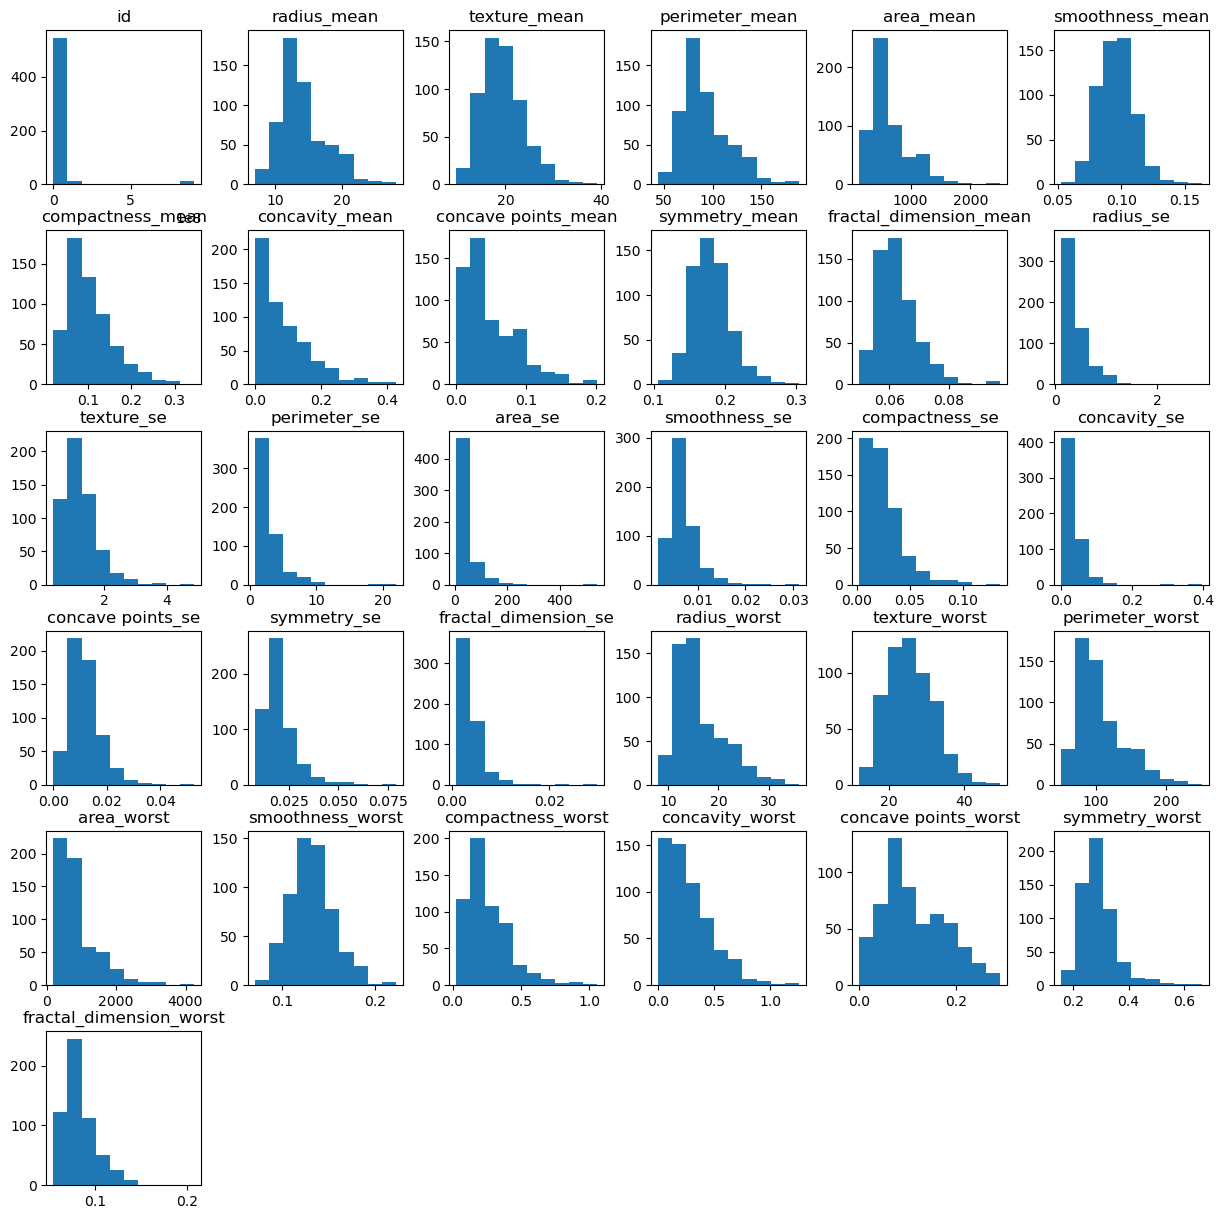

In [9]:
hist_mean=df.hist(bins=10,figsize=(15,15),grid=False)

## Correlation Analysis 

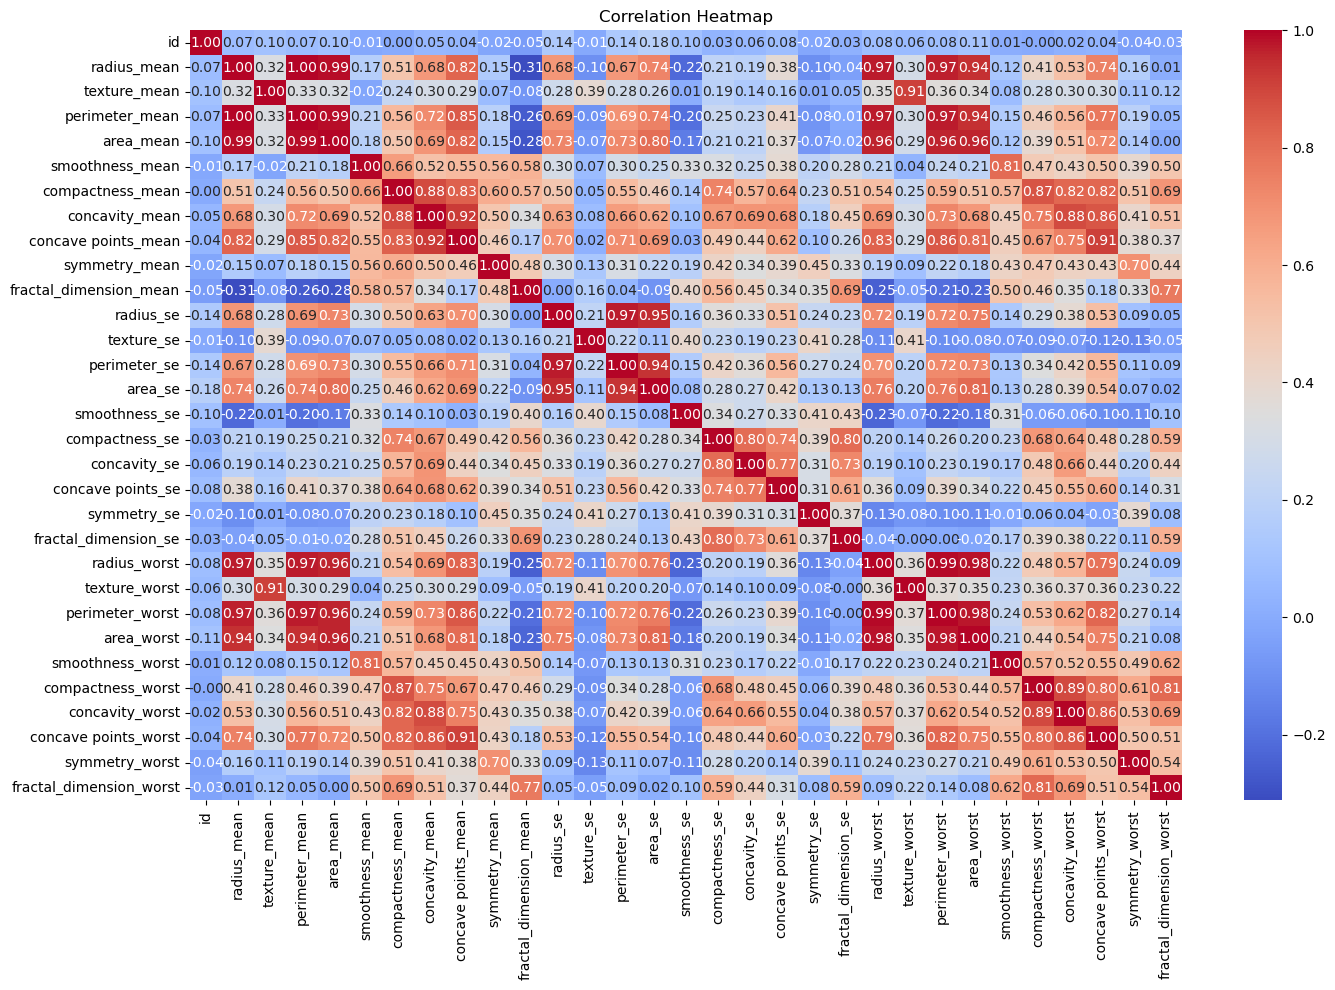

In [10]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
Y = df['diagnosis'].values
print(type(Y))
print(Y.shape)
X = df.drop(['diagnosis'] , axis = 1).values
print(X.shape)

X_train , X_test , Y_train , Y_test  = train_test_split(X , Y , test_size = 0.2 , random_state = 15)

<class 'numpy.ndarray'>
(569,)
(569, 31)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer   #Using the dataset via scikitlearn.datasets
from sklearn.model_selection import train_test_split

In [14]:
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'],['target']))

In [15]:
x = df_cancer.drop(['target'],axis =1)
y= df_cancer['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(x_train, y_train)
y_predict =logistic_model.predict(x_test)
cm = confusion_matrix(y_test,y_predict)

In [17]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        48
         1.0       0.93      1.00      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [18]:
#Training the data and splitting
x = df_cancer.drop(['target'],axis =1)
y= df_cancer['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

#logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(x_train, y_train)
y_predict =logistic_model.predict(x_test)
cm = confusion_matrix(y_test,y_predict)

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        48
         1.0       0.93      1.00      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have your data properly loaded and split as x_train, y_train, x_test, y_test

# Standardize features (scaling) - optional but often recommended for KNN
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(x_train, y_train)

# Make predictions on the test set
y_predict = knn_model.predict(x_test)

# Calculate confusion matrix and print classification report
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [20]:
from sklearn.metrics import accuracy_score
import numpy as np

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax() + 1)

The best accuracy was with 0.9649122807017544 with k= 4


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear', random_state = 0)
svm_model.fit(x_train, y_train)
y_predict =svm_model.predict(x_test)
cm = confusion_matrix(y_test,y_predict)

In [22]:
min_train =x_train.min()
range_train =(x_train - min_train).max()
x_train_scaled =(x_train-min_train)/range_train

In [23]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9646655000673039

In [24]:
from sklearn.metrics import jaccard_score

# Assuming you have already made predictions and stored them in yhat
jaccard_similarity = jaccard_score(y_test, yhat)

print("Jaccard Similarity Score:", jaccard_similarity)

Jaccard Similarity Score: 0.9428571428571428
